---
title: "Airline Performance Analysis"
author: Gentry Lamb
format:
  html:
    embed-resources: true
---

- **Objective:** Explore airline operational performance in the U.S. using Bureau of Transportation Statistics data.

- **Key Questions:**
  1. Which airlines experience the largest departure delays or early departures?
  2. Which days of the week are busiest?
  3. Which airports and airlines have the worst average delays?
  4. How common are cancellations, and what are the main causes?
  5. Are there trends in daily flight volumes over time?

In [183]:
#| label: imports

# Package Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import calendar


# Read in Data
data_dir = "../data/"
df_max_delay = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem01.csv")
df_early = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem02.csv")
df_days = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem03.csv")
df_avg_delay = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem04.csv")
df_airport = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem05.csv")
df_cancel = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem06b.csv")
df_trends = pd.read_csv(data_dir+"Miniproject_Lamb_Gentry_gjl53_problem07.csv")

In [184]:
#| label: theme

# Create own theme for plots
import matplotlib as mpl
import matplotlib.colors as mcolors


# Category palette
category_palette = [
    "#6ca0dc",  # light denim blue
    "#ffb5a7",  # blush coral
    "#88c0d0",  # arctic blue
    "#a5a8f0",  # soft violet
    "#f6bd60",  # golden pastel
    "#cb997e",  # tan
    "#b5ead7",  # mint green 
]

# Continuous palette
cont_colors = [category_palette[0], category_palette[6], category_palette[3]]
continuous_cmap = mcolors.LinearSegmentedColormap.from_list(
    "dsan6300", cont_colors
)
mpl.colormaps.register(continuous_cmap, force=True)
continuous_palette = sns.color_palette("dsan6300", n_colors=15)

# Heatmap palette
heatmap_palette = [
    "#edf6f8", "#d3e8ed", "#b8dbe3", "#9fcdd9",
    "#7ebac8", "#5ea7b6", "#4a90a4", "#367b8d"
]

# Plot features
custom_style = {
    # Background
    "figure.facecolor": "#eaf4f9",
    "axes.facecolor": "#eaf4f9",
    # Axes
    "axes.edgecolor": "#5c5c5c",
    "axes.labelcolor": "#333333",
    "axes.titlesize": 18,
    "axes.titlecolor": "#2f2f2f",
    "axes.labelsize": 14,
    # Ticks
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    # Grid
    "grid.color": "#cccccc",
    # Legend
    "legend.fontsize": 12,
    "legend.title_fontsize": 14,
    "legend.edgecolor": "#333333",
    # Font
    "font.family": "sans-serif",
    "font.sans-serif": ["Segoe UI", "Lato", "DejaVu Sans"],
    # Default line/mark color
    "axes.prop_cycle": mpl.cycler(color=category_palette)
}

# funciton to define style and palette
def use_custom_style(palette=continuous_palette):
    mpl.rcParams.update(custom_style)
    sns.set_palette(palette)

/tmp/ipykernel_115852/1186038296.py:24: UserWarning: Overwriting the cmap 'dsan6300' that was already in the registry.
  mpl.colormaps.register(continuous_cmap, force=True)


### Departure Delays by Airline

- **Data:** Query #1 – maximal departure delays per airline.
- **Visualization:** Horizontal bar chart showing each airline’s maximum delay.
- **Insight:**
  - Identify airlines with extreme delays.
  - Discuss operational challenges (weather, airline size, hub congestion).

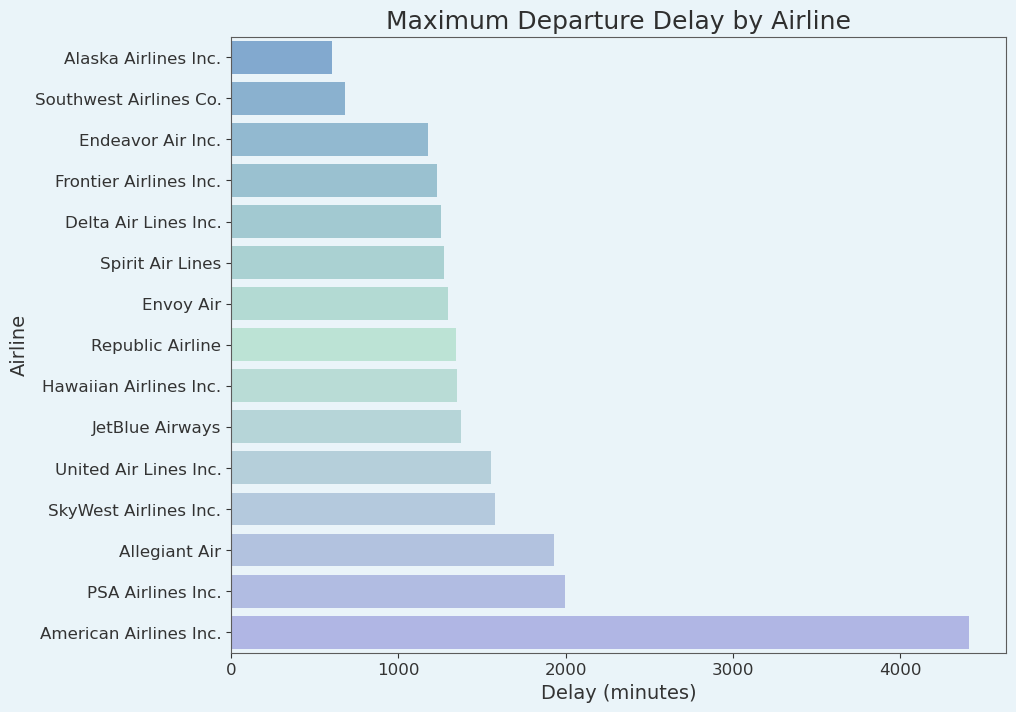

In [185]:
#| label: airline-departure-delay

use_custom_style(continuous_palette)
# Drop Airline Code information after colon for better viewing
df_max_delay['Airline'] = df_max_delay['Airline'].str.split(':').str[0]
# Create barplot of airline versus departure delay
plt.figure(figsize=(10,8))
sns.barplot(x="Max_Departure_Delay", y="Airline", data=df_max_delay, hue="Airline", legend=False)
plt.title("Maximum Departure Delay by Airline")
plt.xlabel("Delay (minutes)")
plt.ylabel("Airline")
plt.show()

### Maximal Early Departures


- **Data:** Query #2 – maximal early departures per airline.
- **Visualization:** Horizontal bar chart showing airlines with largest early departures.
- **Insight:**
  - Identify airlines that depart significantly early (potentially causing passenger issues).
  - Compare early departures vs. delays.

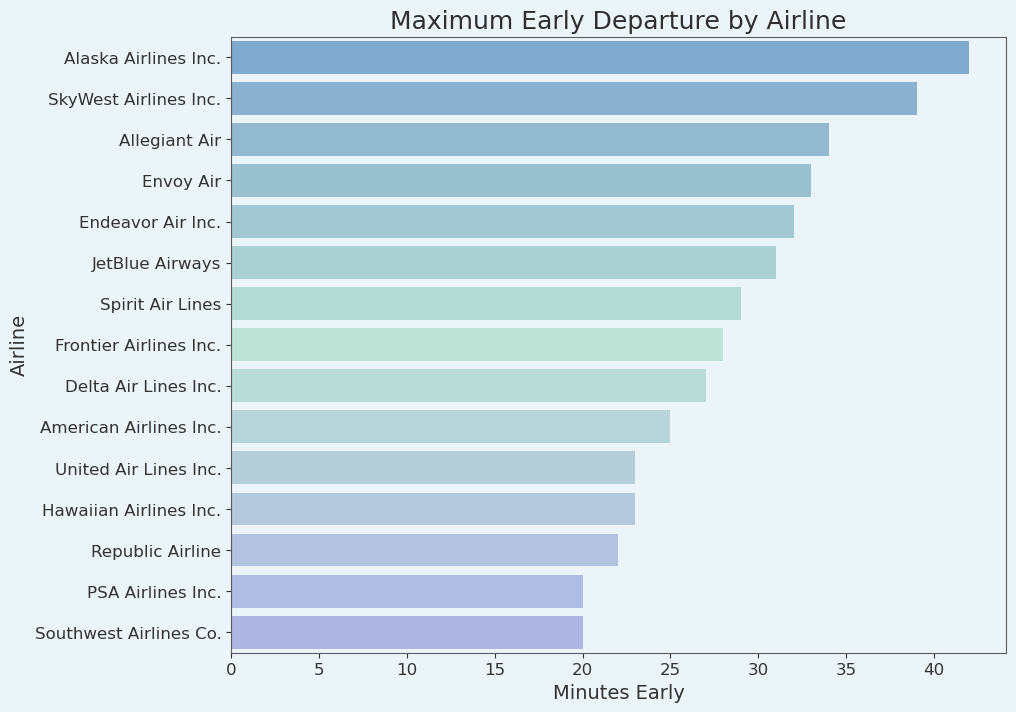

In [186]:
#| label: airline-early-departure

use_custom_style(continuous_palette)
# Drop Airline Code information after colon for better viewing
df_early['Airline'] = df_early['Airline'].str.split(':').str[0]
# Create barplot of airline versus early departure
plt.figure(figsize=(10,8))
sns.barplot(x="Max_Early_Departure", y="Airline", data=df_early, hue="Airline", legend=False)
plt.title("Maximum Early Departure by Airline")
plt.xlabel("Minutes Early")
plt.ylabel("Airline")
plt.show()

## Busiest Days of the Week

- **Data:** Query #3 – flights per day of the week.
- **Visualization:**
  - Bar chart of total flights by day of the week.
  - Overlay rank labels for clarity.
- **Insight:**
  - Identify busiest days (e.g., Monday or Friday).
  - Discuss operational implications, staffing, and hub congestion.

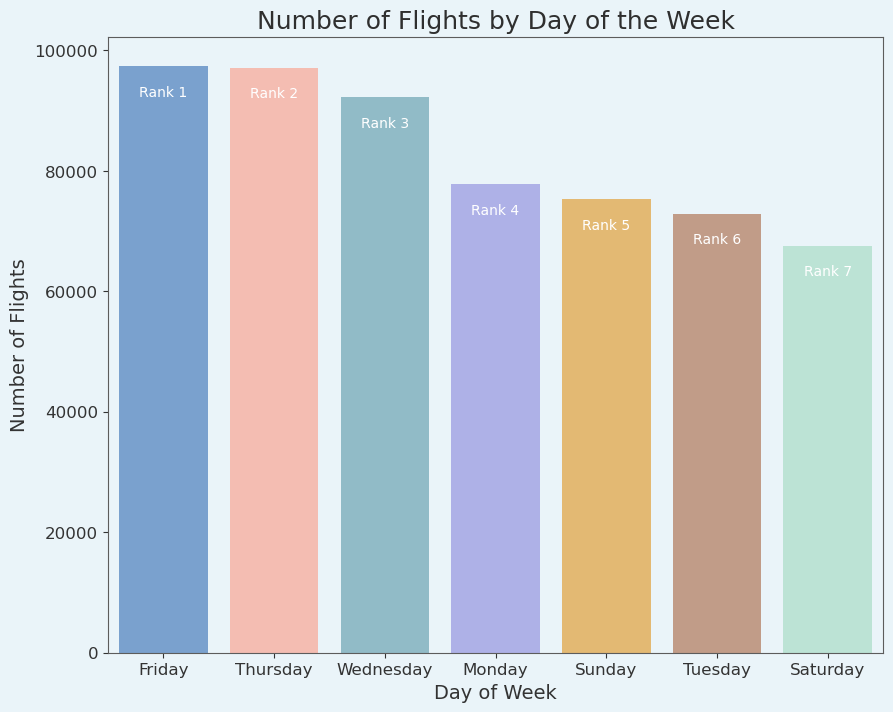

In [187]:
#| label: day-rank

use_custom_style(category_palette)
# Create barplot of day versus number of flights on avg
plt.figure(figsize=(10,8))
sns.barplot(x="Day", y="Num_Flights", data=df_days, legend=False, hue="Day")
plt.title("Number of Flights by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
for i, row in df_days.iterrows():
    plt.text(i, row.Num_Flights - 5000, f"Rank {row.Day_Rank}", ha='center', color='white')
plt.show()

### Worst Airport by Average Departure Delay

- **Data:** Query #4 – airport with highest average departure delay.
- **Visualization:** Highlight the airport in a single point chart or infographic.
- **Insight:**
  - Name the “worst-performing” airport.
  - Discuss possible causes: congestion, weather, operational factors.

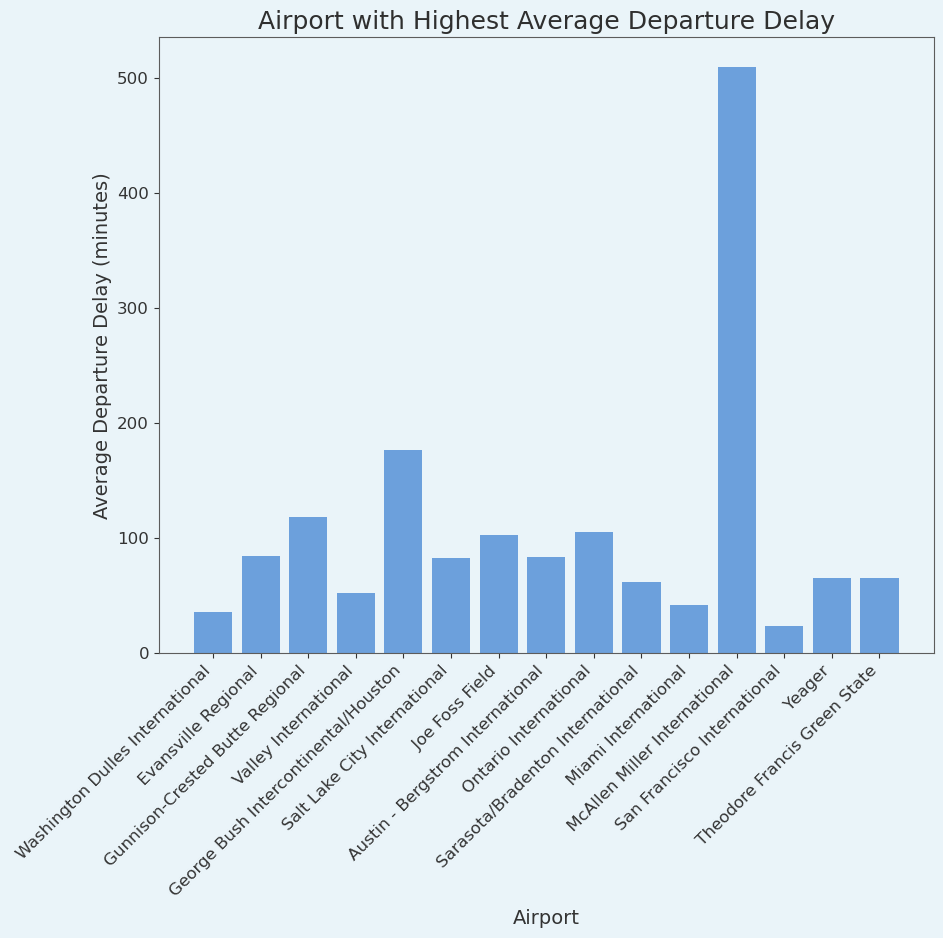

In [188]:
#| label: airport-departure-delay

use_custom_style(category_palette)
# Drop Airport city information before colon for better viewing
df_airport['Airport_Name'] = df_airport['Airport_Name'].str.split(':').str[1]
# Create barplot of day versus number of flights on avg
plt.figure(figsize=(10,8))
plt.bar(df_airport["Airport_Name"], df_airport["Highest_Avg_Delay"])
plt.title("Airport with Highest Average Departure Delay")
plt.ylabel("Average Departure Delay (minutes)")
plt.xlabel("Airport")
# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')
plt.show()


### Worst Airport per Airline

- **Data:** Query #5 – airport with highest average delay for each airline.
- **Visualization:**
  - Heatmap or grouped bar chart: airlines vs. airport delays.
- **Insight:**
  - Highlight patterns: do certain airlines consistently have problematic airports?
  - Discuss operational decision-making (hub strategies, scheduling).





### Total Number of Cancellations

- **Data:** Query #6a.
- **Visualization:** Pie chart of canceled vs. completed flights.
- **Insight:**
  - Cancellation rate is low (<1% of flights) but significant for passengers.


In [189]:
#| label: cancellations

use_custom_style(category_palette)
# Create barplot of day versus number of flights on avg

### Most Frequent Reason per Airport

- **Data:** Query #6b.
- **Visualization:**
  - Stacked bar chart: airports vs. cancellation reasons.
  - Top 10 airports by number of cancellations for clarity.
- **Insight:**
  - Weather vs. carrier vs. NAS vs. security.
  - Operational recommendations to reduce cancellations.

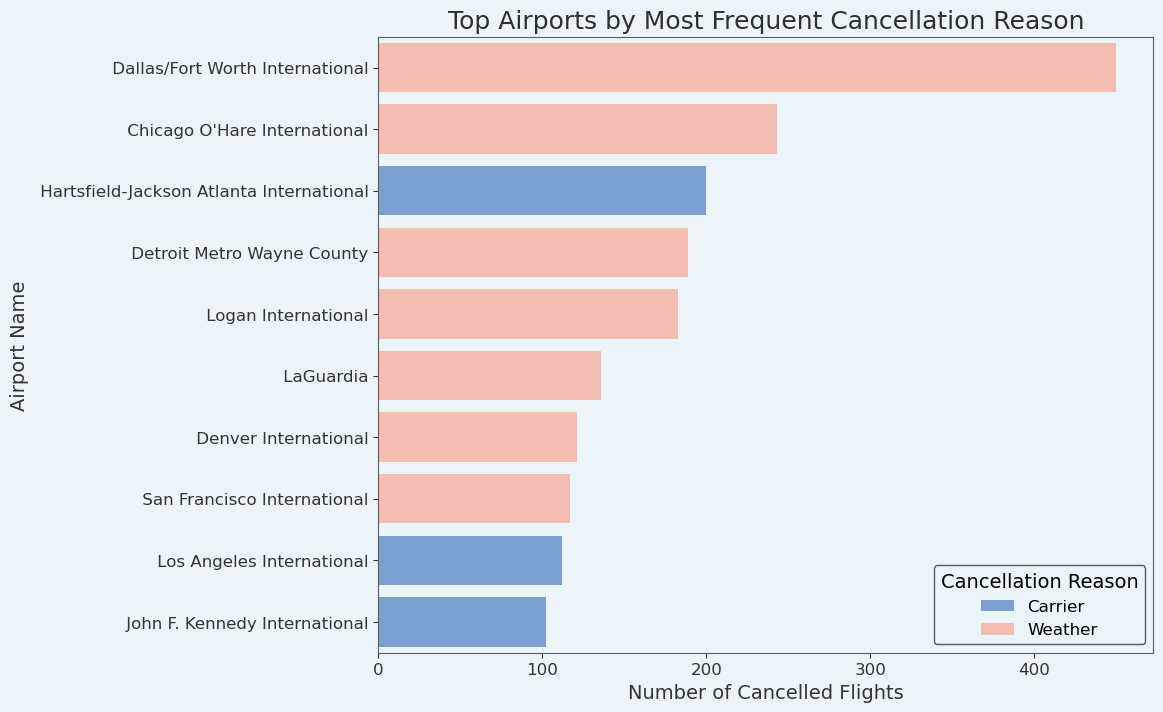

In [190]:
#| label: airport-cancellation-reason

use_custom_style(category_palette)
# Drop Airport city information before colon for better viewing
df_cancel['Airport_Name'] = df_cancel['Airport_Name'].str.split(':').str[1]
# Select top 10 airports by total cancellations
top_airports = df_cancel.groupby("Airport_Name")["Num_Cancelled"].sum().nlargest(10).index
df_top = df_cancel[df_cancel.Airport_Name.isin(top_airports)]
# Ensure bars are ordered by total cancellations
airport_order = df_top.groupby("Airport_Name")["Num_Cancelled"].sum().sort_values(ascending=False).index
# Create barplot of day versus number of flights on avg
plt.figure(figsize=(10,8))
sns.barplot(x="Num_Cancelled", y="Airport_Name", hue="Most_Frequent_Reason", data=df_top, order=airport_order)
plt.legend(title="Cancellation Reason")
plt.title("Top Airports by Most Frequent Cancellation Reason")
plt.ylabel("Airport Name")
plt.xlabel("Number of Cancelled Flights")
plt.show()

In [193]:
df_cancel.groupby("Most_Frequent_Reason")["Num_Cancelled"].sum().sort_values(ascending=False)


Most_Frequent_Reason
Weather                3947
Carrier                1052
National Air System      69
Name: Num_Cancelled, dtype: int64

<Axes: xlabel='Most_Frequent_Reason', ylabel='Airport_Name'>

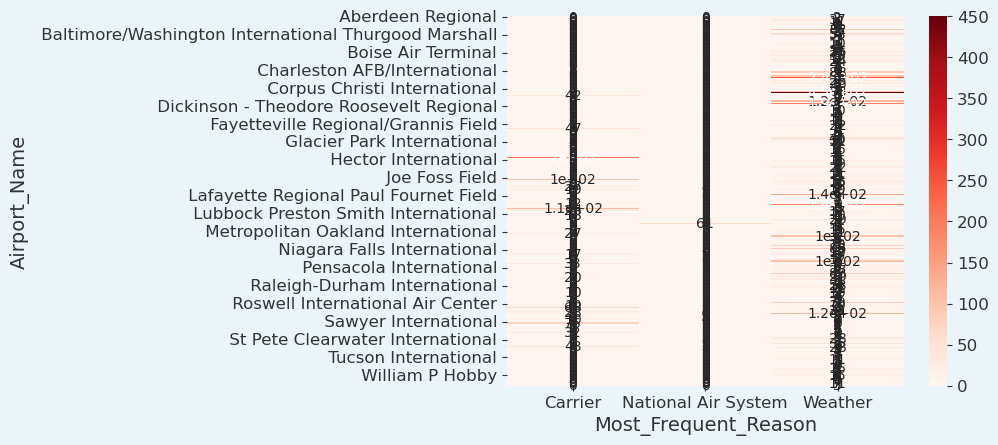

In [194]:
# Example: Pivot table for heatmap
pivot = df_cancel.pivot_table(
    index='Airport_Name', 
    columns='Most_Frequent_Reason', 
    values='Num_Cancelled', 
    aggfunc='sum',
    fill_value=0
)
sns.heatmap(pivot, cmap="Reds", annot=True)


### Temporal Trends in Flight Volume

- **Data:** Query #7 – 3-day rolling average of daily flights.
- **Visualization:**
  - Line chart: `Flights_Per_Day` vs. `Avg_Previous_3_Days`.
  - Highlight trends, peaks, and dips.
- **Insight:**
  - Detect periods of higher traffic.
  - Identify volatility and possible operational strain.

In [191]:
#| label: helper-functions

# function for annotations
def annotate_point(idx, metric='Max'):
    # get values
    flight_date = df_trends['FlightDate'][idx]
    flights = df_trends["Flights_Per_Day"][idx]
    day_name = calendar.day_name[flight_date.weekday()]
    x_offset = -pd.Timedelta(hours=36) if metric == 'Max' else pd.Timedelta(hours=72)
    y_offset = -1500 if metric == 'Max' else 500
    # add annotation
    plt.annotate(f'{metric} flights: {flights}\nOccurred on a {day_name}',
             xy=(flight_date, flights),
             xytext=(flight_date+x_offset, flights+y_offset),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             ha='center', fontsize=10)

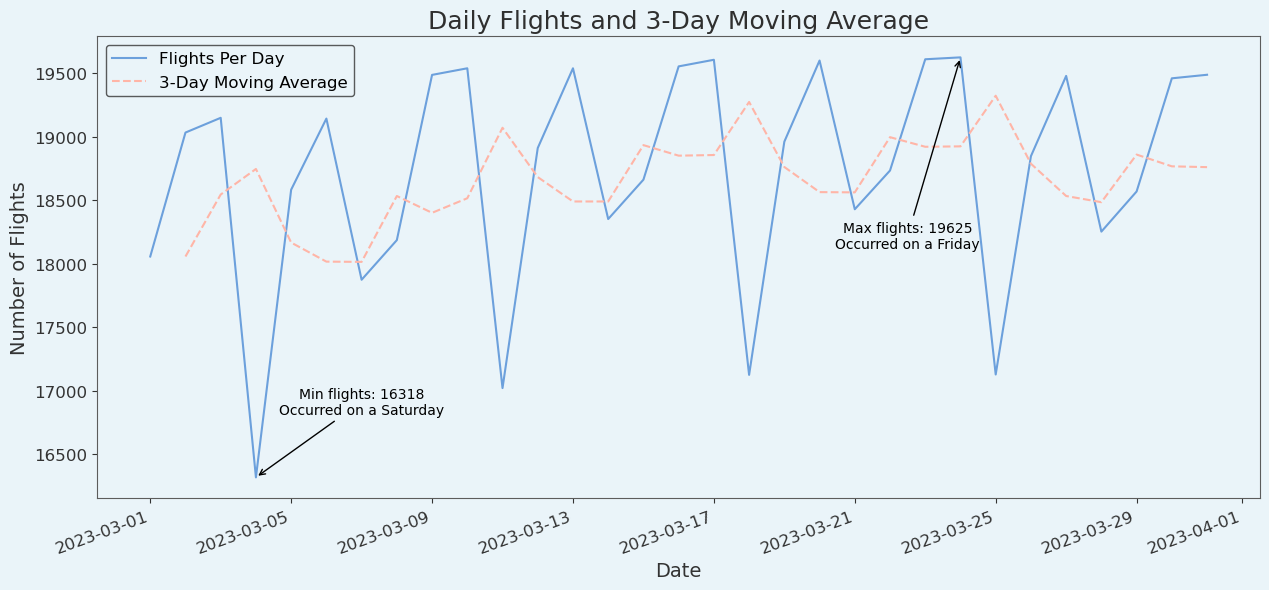

In [192]:
#| label: temporal-trends

use_custom_style(category_palette)
# convert date column to datetime
df_trends["FlightDate"] = pd.to_datetime(df_trends["FlightDate"])
# Create barplot of day versus number of flights on avg
plt.figure(figsize=(15,6))
plt.plot(df_trends["FlightDate"], df_trends["Flights_Per_Day"], label="Flights Per Day")
plt.plot(df_trends["FlightDate"], df_trends["Avg_Previous_3_Days"], label="3-Day Moving Average", linestyle='--', )
plt.title("Daily Flights and 3-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.legend()
# rotate labels
plt.xticks(rotation=20, ha='right')

# Annotate max and min of Flights_Per_Day
max_idx = df_trends["Flights_Per_Day"].idxmax()
min_idx = df_trends["Flights_Per_Day"].idxmin()
annotate_point(max_idx, 'Max')
annotate_point(min_idx, 'Min')

plt.show()